In [2]:
using BenchmarkTools, LinearAlgebra, BandedMatrices, Polynomials, PyPlot, LaTeXStrings, CSV, DataFrames, Dates
include("backSub.jl")
include("invBiU.jl")

BLAS.get_num_threads()


# BLAS.set_num_threads(8)
# BLAS.get_num_threads()


8

Bidiagonal{Float64, Vector{Float64}}
Bidiagonal{Float64, Vector{Float64}}
Bidiagonal{Float64, Vector{Float64}}
Bidiagonal{Float64, Vector{Float64}}
Bidiagonal{Float64, Vector{Float64}}
Bidiagonal{Float64, Vector{Float64}}
Bidiagonal{Float64, Vector{Float64}}
Bidiagonal{Float64, Vector{Float64}}


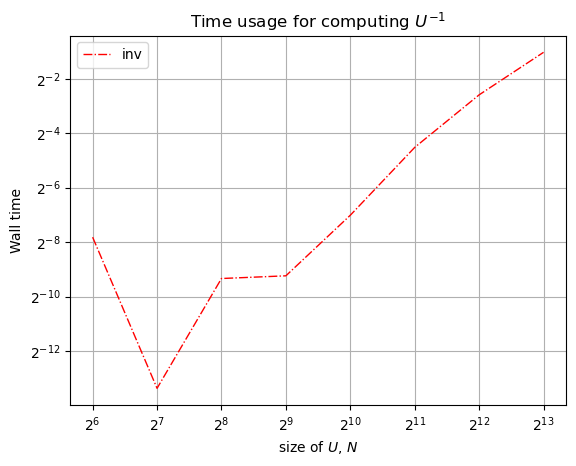

1×8 Matrix{Float64}:
 0.00441815  9.44426e-5  0.00154394  …  0.0434037  0.165281  0.487839

In [3]:

function getU(n, bᵤ, Utype="mat", elmtype="float")
    if Utype == "banded"
        if elmtype == "bigfloat"
            U = big.(BandedMatrix(rand(n, n), (0, bᵤ))) + 100*I
        else
            U = BandedMatrix(rand(n, n), (0, bᵤ)) + 100*I
        end
        println(typeof(U))
        return U
    end

    if elmtype == "bigfloat"
        U = big.(rand(n, n)) + 100*I
    else
        U = rand(n, n) + 100*I
    end

    if Utype == "bidiag" && bᵤ == 1
        U = Bidiagonal(U, :U)
    else
        U = triu(U) - triu(U, bᵤ+1) + 100*I
    end
    println(typeof(U))
    U;
end


function timer4Uxb(func, dims, bᵤ, Utype, elmtype, rept, nthreads)
    BLAS.set_num_threads(nthreads)
    times4func = zeros(length(dims))
    for (i, n) in enumerate(dims)
        U = getU(n, bᵤ, Utype, elmtype)
        atime4func = 0.0
        for _ in 1:rept
            atime4func += @elapsed func(U)
        end
        times4func[i] = atime4func / rept
    end
    times4func;
end

function error4Uxb(func, dims, bᵤ, Utype, elmtype, rept, nthreads)
    BLAS.set_num_threads(nthreads)
    A = getU(3, 1, Utype, elmtype)
    T = eltype(A)
    abserrors4func = zeros(T, length(dims))
    relerrors4func = zeros(T, length(dims))
    for (i, n) in enumerate(dims)
        U = getU(n, bᵤ, Utype, elmtype)
        x = rand(T, n)
        b = U * x
        abserr = zero(T)
        relerr = zero(T)
        for _ in 1:rept
            Uinv = func(U)
            x̂ = Uinv * b
            abserr += norm(x - x̂)
            relerr += abserr / norm(x)
        end
        abserrors4func[i] = convert(T, abserr / rept)
        relerrors4func[i] = convert(T, relerr / rept)
        println(abserrors4func[i])
        println(relerrors4func[i])
    end
    abserrors4func;
    relerrors4func;
end



function data4plot(funcs, dims, bᵤ, Utype, elmtype, rept, nthreads)
    timeusage = zeros(length(funcs), length(dims))
    for (i, func) in enumerate(funcs)
        timeusage[i, :] = timer4Uxb(func, dims, bᵤ, Utype, elmtype, rept, nthreads)
    end
    timeusage;
    # erroranalysis = zeros(length(funcs), length(dims))
    # for (i, func) in enumerate(funcs)
    #     erroranalysis[i, :] = error4Uxb(func, dims, bᵤ, Utype, elmtype, rept, nthreads)
    # end
    # erroranalysis;
end


# timedata = data4plot(funcs, dims, bᵤ, Utype, elmtype, rept, nthreads)

# plot(timedata)
function plot4data(funcs, dims, bᵤ, Utype, elmtype, rept, nthreads)
    timedata = data4plot(funcs, dims, bᵤ, Utype, elmtype, rept, nthreads)
    # println(timedata)
    colorlist = ["red", "blue", "green"]
    linestylelist = ["-.", "--"]
    figure()
    for (i, func) in enumerate(funcs)
        loglog(dims, timedata[i, :], color=colorlist[i], linewidth=1.0, linestyle=linestylelist[i], base=2, label=string(func))
        # plot(dims, timedata[i, :], color=colorlist[i], linewidth=1.0, linestyle=linestylelist[i], label=string(func))
    end
    xlabel(L"size of $U$, $N$")
    ylabel("Wall time")
    # ylabel("Error")
    grid()
    legend()
    title(L"Time usage for computing $U^{-1}$")
    # title(L"Error for computing $Ux=b$")
    # savefig("errors_inv_InvBiU", dpi=150)
    # sss = "11111"
    # xxx = "2222"
    # savefig("./figure/$sss.png", dpi=150)
    # savefig("./figure/$xxx.eps", format="eps")
    timedata
end


function invBanded(U)
    qr(U) \ I
end

funcs = [invBidiagU, inv]
funcs = [inv]
# funcs = [invBidiagU, invBanded]

dims = [2^i for i in 6:13]
bᵤ = 1
Utype = "mat"
Utype = "bidiag"
# Utype = "banded"
# elmtype = "bigfloat"
elmtype = "float"
rept = 8
nthreads = 1

# "bidiag" "big" "banded"
# plot4data(funcs, dims, bᵤ, Utype, elmtype, rept, nthreads)
# elmtype = "bigfloat"
timetaken = plot4data(funcs, dims, bᵤ, Utype, elmtype, rept, nthreads)

-0.00518002 + 1.7277e-5*x + 5.26879e-9*x^2
(-0.005180018836111874, 1.7277045287099907e-5, 5.268794265264959e-9)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


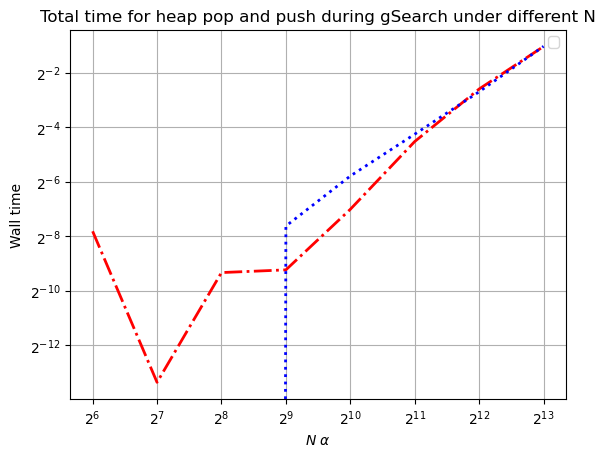

PyObject Text(0.5, 1.0, 'Total time for heap pop and push during gSearch under different N')

In [4]:
figure(1)
nlist = dims
tk1 = timetaken[end, :]
loglog(nlist, tk1, color="red", linewidth=2.0, linestyle="-.", base = 2)
# plot(nlist, tk1, color="red", linewidth=2.0, linestyle="-.")


fst = 1
lst = length(nlist)



# ploy1 = fit(nlist[fst:lst].*log2.(nlist[fst:lst]), tk1[fst:lst], 1)
# b1, a1 = ploy1.coeffs[1], ploy1.coeffs[2]
# println((a1, b1))

ploy2 = fit(nlist[fst:lst], tk1[fst:lst], 2)
println(ploy2)
c, b, a = ploy2.coeffs[1], ploy2.coeffs[2], ploy2.coeffs[3]

println((c, b, a ))

loglog(nlist, a.*nlist.^2 .+ b.*nlist .+ c, color="blue", linewidth=2.0, linestyle="dotted", base = 2)
# plot(nlist, a.*nlist.^2 .+ b.*nlist .+ c, color="blue", linewidth=2.0, linestyle="dotted")

xlabel(L"$N$ $\alpha$")
ylabel("Wall time")
grid()
legend()
title("Total time for heap pop and push during gSearch under different N")




In [7]:

function generateTestTriangular(dim, bw, typeM, typeElmt, isUpper=true)
    if bw <= 0
        return -1
    end
    
    U = rand(typeElmt, dim, dim) + dim*I

    if typeM == Matrix
        U = triu(U) - triu(U, bw+1)
    elseif typeM == Bidiagonal
        bw == 1 ? U = Bidiagonal(U, :U) : return -1
    elseif typeM == BandedMatrix
        bw <= n-1 ? U = BandedMatrix(U, (0, bw)) : return -1
    elseif typeM == UpperTriangular
        bw == n-1 ? U = UpperTriangular(U) : return -1
    else
        return -1
    end

    if isUpper
        return U
    else
        return U'
    end
end


function generateTestTridiagonal(dim, typeM, typeElmt, isSymPosiDef=true)
    T = rand(typeElmt, dim, dim) + dim*I

    if typeM == Matrix
        T = triu(T, -1) - triu(T, 2)
    elseif typeM == Tridiagonal
        T = Tridiagonal(T)
    elseif typeM == BandedMatrix
        T = BandedMatrix(T, (1, 1))
    else
        return -1
    end

    if isSymPosiDef
        return 0.5(T + T')
    else
        return T
    end
end



generateTestTridiagonal (generic function with 2 methods)

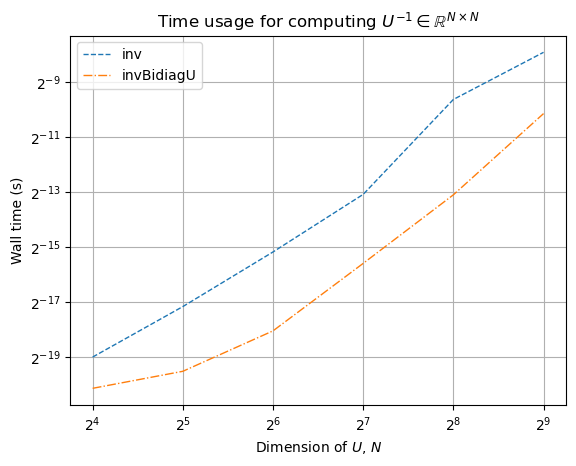

6×2 Matrix{Float64}:
 1.89081e-6   8.5925e-7
 6.75781e-6   1.32031e-6
 2.68098e-5   3.66131e-6
 0.000114648  2.00991e-5
 0.00125692   0.000113362
 0.00413118   0.000880229

In [13]:

function timeAvg4func(func, testMat, rept, nThreads)
    BLAS.set_num_threads(nThreads)
    time = 0.0
    for _ in 1:rept
        time += @elapsed func(testMat)
    end
    time / rept;
end


function timesData4funcs()
    # M = generateTestTriangular(n, bw, typeM, typeElmt, isUpper)
    # M = generateTestTridiagonal(n, typeM, typeElmt, isSymPosiDef)
    dims = [2^i for i = 4:9]
    bw = 1
    typeM = Matrix
    typeElmt = Float64
    isUpper = true
    rept = 16
    nThreads = 1
    funcs = [inv, invBidiagU]
    saveData = false
    saveFig = false


    timesData = zeros(length(dims), length(funcs))

    BLAS.set_num_threads(nThreads)
    for (j, func) in enumerate(funcs)
        for (i, n) in enumerate(dims)
            testMat = generateTestTriangular(n, bw, typeM, typeElmt, isUpper)
            timesData[i, j] = timeAvg4func(func, testMat, rept, nThreads)
        end
    end
    BLAS.set_num_threads(8)

    if saveData
        df_data = DataFrame(timesData, :auto)
        rename!(df_data, string.(funcs))
        df_dims = DataFrame(size = dims)
        df = hcat(df_dims, df_data)
        time = string(now())
        CSV.write("./data/efficiency/$time$typeM$typeElmt.csv", df)
        # CSV.write("./data/accuracy/$time$typeM$Float64.csv", df)
    end

    linestylelist = ["--", "-.", ":", "-", ]

    figure()
    for (j, func) in enumerate(funcs)
        # loglog(dims, timesData[:, j], color=colorlist[j], linewidth=1.0, linestyle=linestylelist[j], base=2, label=string(func))
        loglog(dims, timesData[:, j], linewidth=1.0, linestyle=linestylelist[j], base=2, label=string(func))
    end
    xlabel(L"Dimension of $U$, $N$"), ylabel("Wall time (s)"), grid(), legend()
    title(L"Time usage for computing $U^{-1} \in \mathbb{R}^{N \times N}$")
    show()
    if saveFig
        savefig("./figure/efficiency/$time$typeM$typeElmt.png", dpi=150)
        savefig("./figure/efficiency/$time$typeM$typeElmt.eps", format="eps")
    end
    timesData;
end



timesData4funcs()


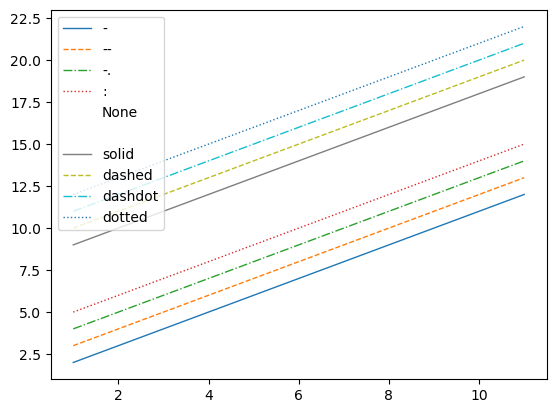

PyObject <matplotlib.legend.Legend object at 0x16fe21640>

In [10]:
# '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'"


ls = ["-", "--", "-.", ":", "None", " ", "", "solid", "dashed", "dashdot", "dotted"]
n = length(ls)
figure()
x = [i for i = 1:n]
for i = 1:n
    plot(x, i.+x, linewidth=1.0, linestyle=ls[i], label=ls[i])
#     # plot(dims, timedata[i, :], color=colorlist[i], linewidth=1.0, linestyle=linestylelist[i], label=string(func))
end
legend()


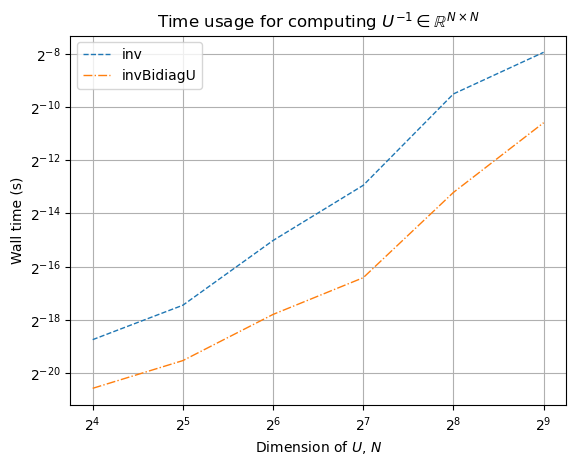

"./data/2022-08-26T06:24:29.895.csv"

In [11]:
# using Dates, CSV, DataFrames
# string(now())

# dims = [2^i for i = 4:9]
# # println(typeof(dims))
# data = timesData4funcs()

# df_data = DataFrame(data, :auto)
# rename!(df_data, string.([inv, invBidiagU]))
# df_dims = DataFrame(size = dims)
# df = hcat(df_dims, df_data)

# # # # [inv, invBidiagU]
# # # df
# time = string(now())

# CSV.write("./data/$time.csv", df)



In [ ]:
a = [inv, invBidiagU]
append!(string.(a), string.(a))

In [ ]:
typeof(@belapsed inv(rand(5,5)+5I))

In [ ]:
#  nonHermitian posi def

function genNonHPosiDef(m)
    function genGLap(m)
        A = ones(m, m)
        for _ in 1:Int64(floor(m^2/2))
            i, j = rand(1:m), rand(1:m)
            A[i, j] = 0
        end
        A1 = triu(A, 1)
        A2 = A1'
        A3 = A1 + A2
        d = sum(A3, dims = 1)
        # display(A3)
        # display(d)
        D = Diagonal(vec(d))
        # display(D)
        GL = D - A3
        GL;
    end
    B = genGLap(m) + I
    C = genGLap(m) + I
    A = B + 1.0im.*C
    A
end

AAA = genNonHPosiDef(6)
display(AAA)
isposdef(AAA) # false ?
